In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Datasets/cleveland.csv')
cols = ['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholestrol',
      'fasting_bp', 'rest_ecg', 'max_heartrate', 'exercise_induced_anigma', 
      'oldpeak_st', 'slope_st', 'major_vessels', 'thal', 'target']
df.columns=cols
print("Shape : ",df.shape)

Shape :  (302, 14)


In [2]:
df.head()

,age,sex,chest_pain_type,rest_bp,cholestrol,fasting_bp,rest_ecg,max_heartrate,exercise_induced_anigma,oldpeak_st,slope_st,major_vessels,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
print(df.dtypes)

age                          int64
sex                          int64
chest_pain_type              int64
rest_bp                      int64
cholestrol                   int64
fasting_bp                   int64
rest_ecg                     int64
max_heartrate                int64
exercise_induced_anigma      int64
oldpeak_st                 float64
slope_st                     int64
major_vessels              float64
thal                       float64
target                       int64
dtype: object


In [4]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
rest_bp                    0
cholestrol                 0
fasting_bp                 0
rest_ecg                   0
max_heartrate              0
exercise_induced_anigma    0
oldpeak_st                 0
slope_st                   0
major_vessels              4
thal                       2
target                     0
dtype: int64

In [5]:
df['major_vessels']=df['major_vessels'].interpolate()
df['thal']=df['thal'].interpolate(method='pad')
df['target']=df['target'].map({0:0,1:1,2:1,3:1,4:1})
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
rest_bp                    0
cholestrol                 0
fasting_bp                 0
rest_ecg                   0
max_heartrate              0
exercise_induced_anigma    0
oldpeak_st                 0
slope_st                   0
major_vessels              0
thal                       0
target                     0
dtype: int64

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)

Inputs shape  (302, 13)
Outputs shape  (302, 1)


In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.197)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(60, 13)
(242, 1)
(60, 1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

In [9]:
x_train[0]

array([ 0.55570263, -1.47790748,  0.86370844,  2.37974017,  0.04486492,
       -0.41803981, -1.01673728, -0.28852377,  1.40984195, -0.89505761,
        0.61905151, -0.71099177, -0.89291761])

In [10]:
x_test[0]

array([-0.23869421,  0.67663234, -2.28730829, -0.8139852 , -1.14471871,
       -0.41803981,  1.00006945,  1.7173866 , -0.70929937, -0.89505761,
        0.61905151, -0.71099177,  0.64688805])

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda=LinearDiscriminantAnalysis(n_components=1)
y_train=y_train.reshape(-1,)
x_train_lda=lda.fit_transform(x_train,y_train)
x_test_lda=lda.transform(x_test)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


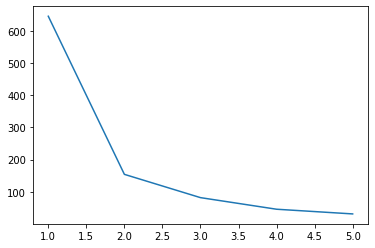

In [12]:
#LDA for all input values to find patterns in clustering
x_c_i=lda.fit_transform(x,y)

wcss=[]
from sklearn.cluster import KMeans
for i in range(1,6):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x_c_i)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)

Even if there were different values in target values {0,1,2,3,4}, maping them to only two classes of output was good indeed as the elbow point in the clusters after LDA optimally leads to two output classes with least wcss 

In [13]:
from sklearn.svm import SVC
svc=SVC()
# svc=SVC(C=0.45,gamma=0.15)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.78      0.91      0.84        23

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



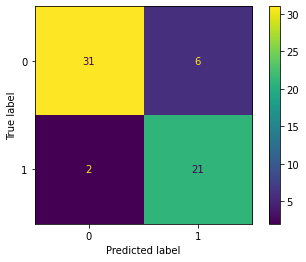

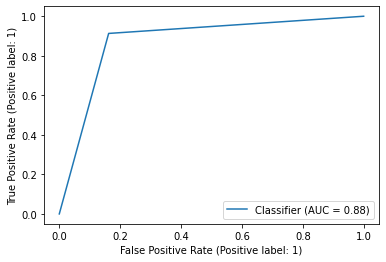

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay,plot_confusion_matrix

matrix_plot=confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=svc.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.78      0.91      0.84        23

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



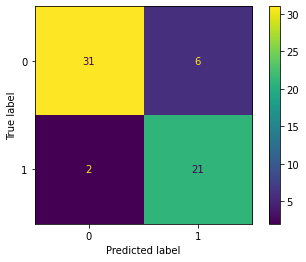

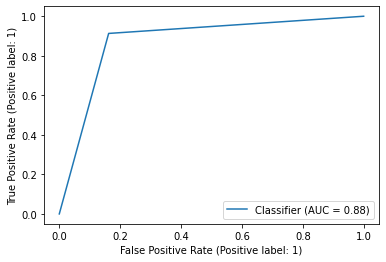

In [15]:
#SVC with LDA
matrix_plot=confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=svc.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.85      0.96      0.90        23

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



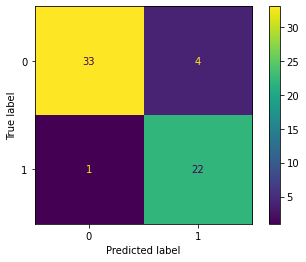

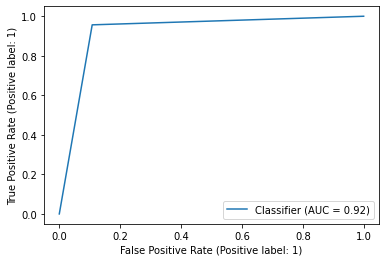

In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10,random_state=2022)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

matrix_plot=confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.93      0.73      0.82        37
           1       0.68      0.91      0.78        23

    accuracy                           0.80        60
   macro avg       0.80      0.82      0.80        60
weighted avg       0.83      0.80      0.80        60



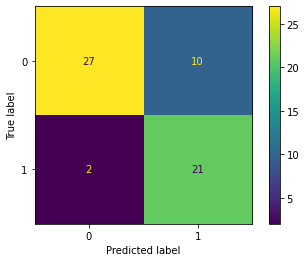

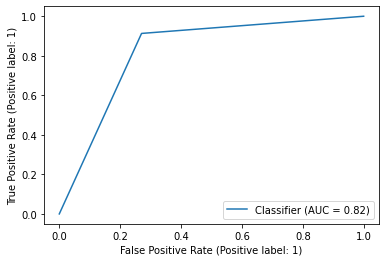

In [17]:
#Random Forest with lda
#guess not good
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100,random_state=2022)
classifier.fit(x_train_lda,y_train)
y_pred=classifier.predict(x_test_lda)

matrix_plot=confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.84      0.91      0.87        23

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



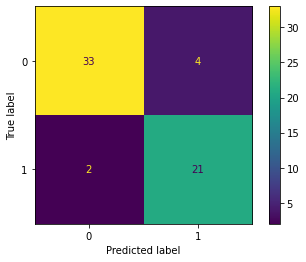

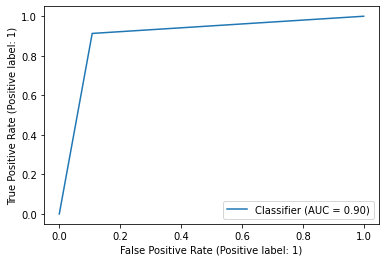

In [18]:
from sklearn.naive_bayes import BernoulliNB
#As a result of standard scalar there exists negative values in data
#Thus not suitable for Multinomial and Categorical NB 
#Bernouli works fine but some features have data which are not boolean like
#Thus I guess its not a fine fit
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)

matrix_plot=confusion_matrix(y_test, y_pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=bnb.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        37
           1       0.81      0.91      0.86        23

    accuracy                           0.88        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



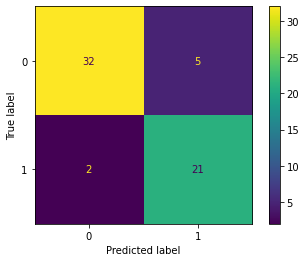

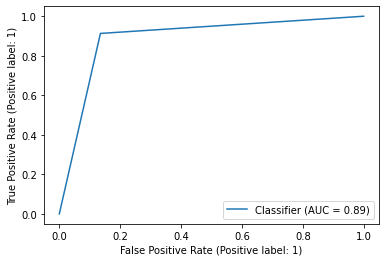

In [19]:
#BernouliNB with LDA 
bnb.fit(x_train_lda,y_train)
y_pred=bnb.predict(x_test_lda)

matrix_plot=confusion_matrix(y_test, y_pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=bnb.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)

In [20]:
import tensorflow as tf
from tensorflow import keras

from  tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)


In [21]:
from keras.models import Sequential
from keras.layers import Dense

input_size=13
output_size=2

ann=Sequential()
ann.add(Dense(units=64,activation='relu',input_shape=(input_size,)))
ann.add(Dense(units=16,activation='relu'))
ann.add(Dense(units=4,activation='relu'))
ann.add(Dense(units=2,activation='sigmoid'))

In [22]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 2,014
Trainable params: 2,014
Non-trainable params: 0
_________________________________________________________________


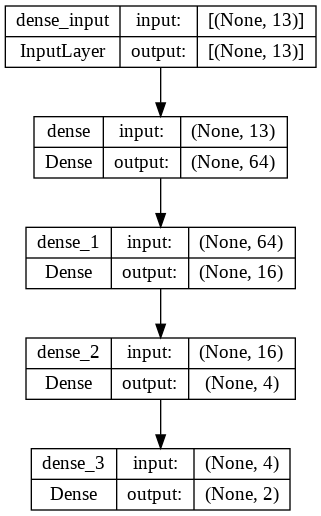

In [23]:
keras.utils.plot_model(ann,show_shapes=True)

In [24]:
ann.compile(loss='BinaryCrossentropy',
            optimizer='adam',
            metrics=['BinaryAccuracy'])

In [25]:
ann.fit(x_train,y_train,
        epochs=9,
        batch_size=10,
        validation_split=0.1)

Epoch 1/9
22/22 [==============================] - 2s 22ms/step - loss: 0.6828 - binary_accuracy: 0.5000 - val_loss: 0.6710 - val_binary_accuracy: 0.5600
Epoch 2/9
22/22 [==============================] - 0s 5ms/step - loss: 0.6403 - binary_accuracy: 0.6290 - val_loss: 0.6127 - val_binary_accuracy: 0.7000
Epoch 3/9
22/22 [==============================] - 0s 3ms/step - loss: 0.5847 - binary_accuracy: 0.6982 - val_loss: 0.5504 - val_binary_accuracy: 0.7600
Epoch 4/9
22/22 [==============================] - 0s 6ms/step - loss: 0.5080 - binary_accuracy: 0.7834 - val_loss: 0.5207 - val_binary_accuracy: 0.8400
Epoch 5/9
22/22 [==============================] - 0s 6ms/step - loss: 0.4502 - binary_accuracy: 0.8203 - val_loss: 0.4962 - val_binary_accuracy: 0.8000
Epoch 6/9
22/22 [==============================] - 0s 8ms/step - loss: 0.4064 - binary_accuracy: 0.8364 - val_loss: 0.4752 - val_binary_accuracy: 0.8000
Epoch 7/9
22/22 [==============================] - 0s 6ms/step - loss: 0.3675 - b

2/2 [==============================] - 0s 5ms/step
Results for ann Model
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.75      0.91      0.82        23

   micro avg       0.85      0.87      0.86        60
   macro avg       0.84      0.88      0.85        60
weighted avg       0.87      0.87      0.86        60
 samples avg       0.86      0.87      0.86        60



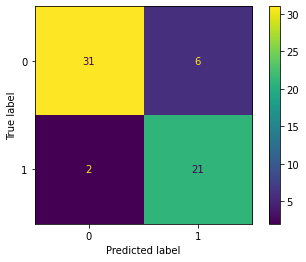

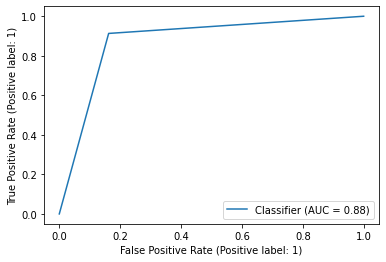

In [34]:

from sklearn.metrics import classification_report, accuracy_score

y_pred = np.round(ann.predict(x_test)).astype(int)

print('Results for ann Model')
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# confusion_matrix(
#     y_test.argmax(axis=1), y_pred.argmax(axis=1))

matrix_plot=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=bnb.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test.argmax(axis=1), y_pred.argmax(axis=1))